/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


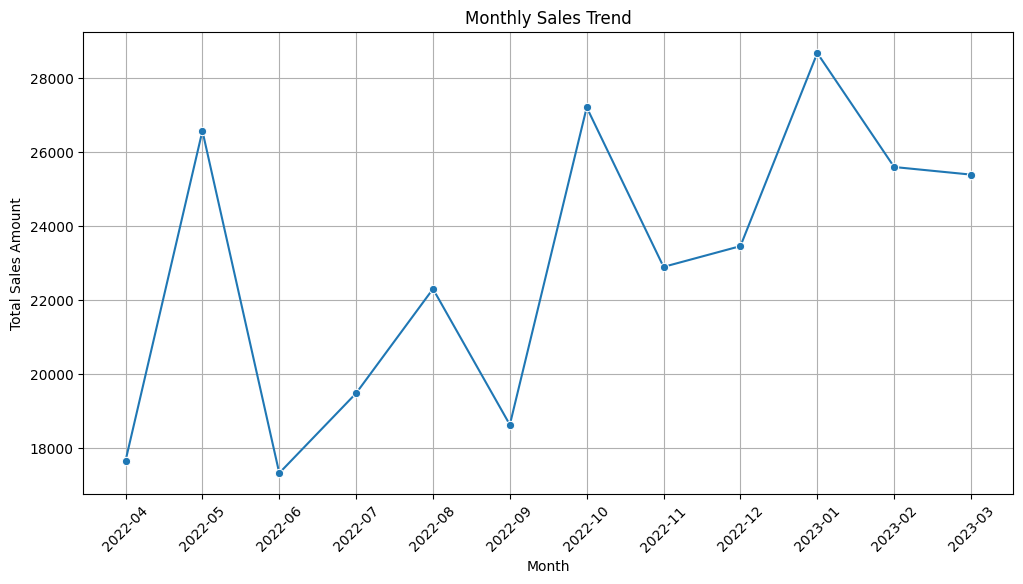

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


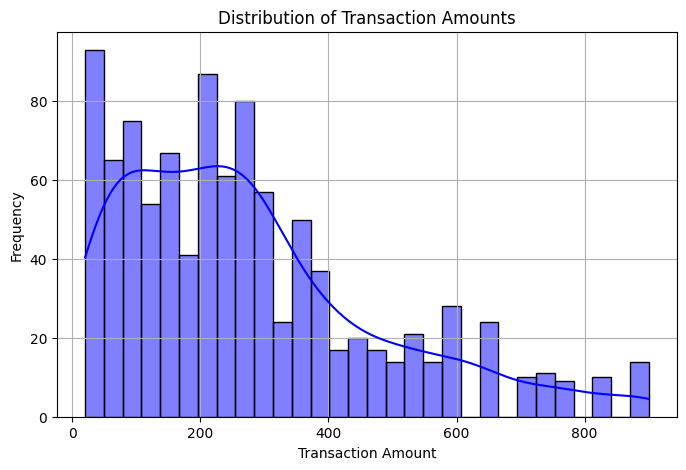

          order_id                        date   item_price     quantity  \
count  1000.000000                        1000  1000.000000  1000.000000   
mean    500.500000  2022-10-03 14:39:50.400000    33.315000     8.162000   
min       1.000000         2022-04-01 00:00:00    20.000000     1.000000   
25%     250.750000         2022-07-04 00:00:00    20.000000     4.000000   
50%     500.500000         2022-10-07 12:00:00    25.000000     8.000000   
75%     750.250000         2023-01-02 00:00:00    50.000000    12.000000   
max    1000.000000         2023-03-30 00:00:00    60.000000    15.000000   
std     288.819436                         NaN    14.921744     4.413075   

       transaction_amount  
count         1000.000000  
mean           275.230000  
min             20.000000  
25%            120.000000  
50%            240.000000  
75%            360.000000  
max            900.000000  
std            204.402979  


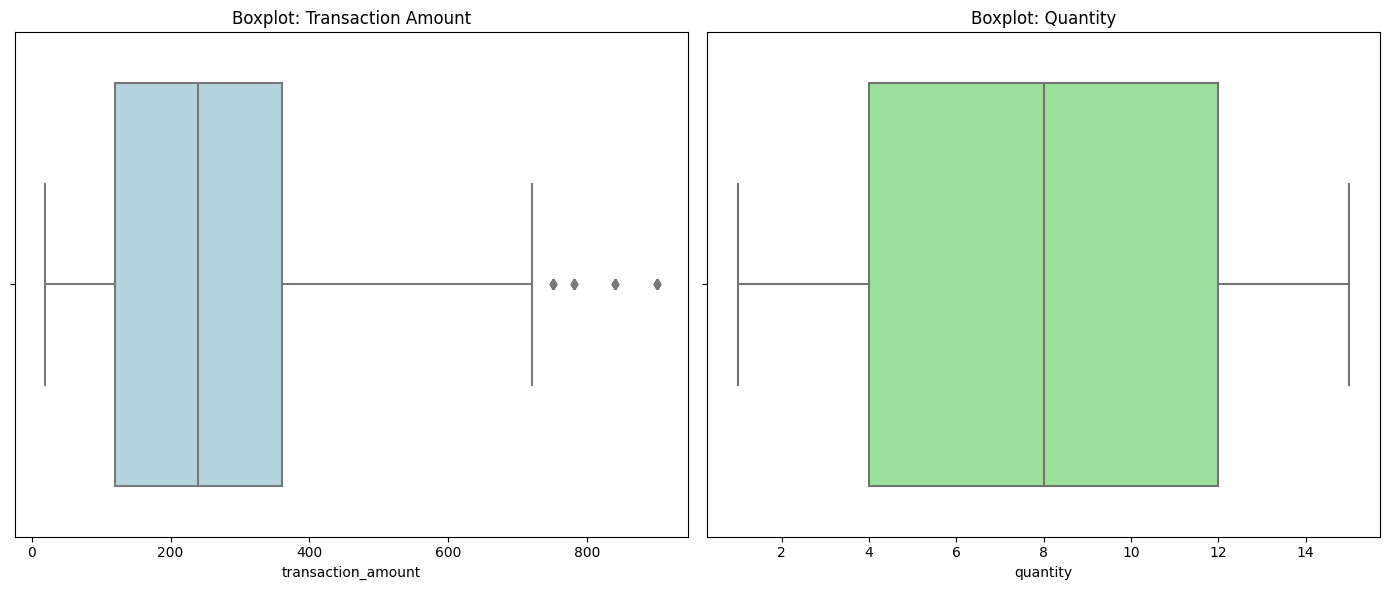

Mean Squared Error: 10298016.80
R-squared Score: 0.52
Predicted Highest Sale in a Month: 29510.87
Predicted Lowest Sale in a Month: 20554.84

Top Selling Items:
item_name
Sandwich           65820.0
Frankie            57500.0
Cold coffee        54440.0
Sugarcane juice    31950.0
Panipuri           24520.0
Name: transaction_amount, dtype: float64


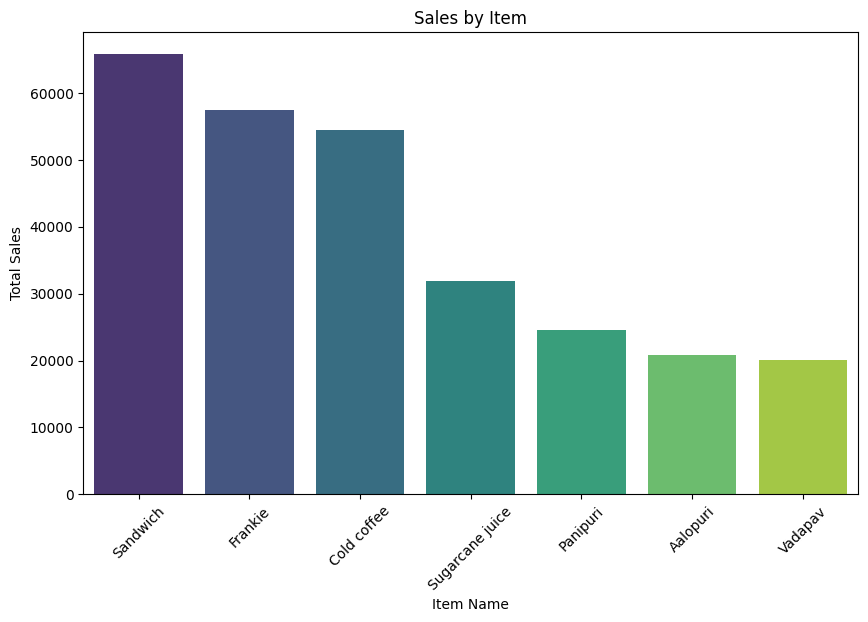

In [ ]:
# Project Title  :Business Analysis Using Linear Regression
# Agenda         : Visualize the sales trend and predict future sales.
# Dataset        : Based on Fast food sales in a Year(Balaji Fast Food Sales.csv)
# Team Members   :  Sreya G(230701334), Tharunraj I(230701362), Velan Arul(230701374)
# Dept & Sec     : CSE _ F


# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("/kaggle/input/balaji-fast-food-sales/Balaji Fast Food Sales.csv")


data_cleaned = data.drop(columns=["Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], errors='ignore')


data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')


data_cleaned['item_price'] = data_cleaned['item_price'].replace('[\$,]', '', regex=True).astype(float)
data_cleaned['transaction_amount'] = data_cleaned['transaction_amount'].replace('[\$,]', '', regex=True).astype(float)


data_cleaned['month'] = data_cleaned['date'].dt.to_period('M')


monthly_sales = data_cleaned.groupby('month')['transaction_amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['transaction_amount'], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


print(data_cleaned.describe())

# Boxplots for outlier detection
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned['transaction_amount'], color="lightblue")
plt.title("Boxplot: Transaction Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['quantity'], color="lightgreen")
plt.title("Boxplot: Quantity")
plt.tight_layout()
plt.show()


# Prepare data for prediction
monthly_data = data_cleaned.groupby('month').agg({
    'transaction_amount': 'sum',
    'quantity': 'sum'
}).reset_index()

# Add numerical month index for regression
monthly_data['month_index'] = range(1, len(monthly_data) + 1)

# Train-test split
X = monthly_data[['month_index']]
y = monthly_data['transaction_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

# Predict highest and lowest sales
future_months = pd.DataFrame({'month_index': range(1, len(monthly_data) + 13)})  # Next 12 months
future_sales = model.predict(future_months)

highest_sale = max(future_sales)
lowest_sale = min(future_sales)
print(f"Predicted Highest Sale in a Month: {highest_sale:.2f}")
print(f"Predicted Lowest Sale in a Month: {lowest_sale:.2f}")


# Analyze item-wise sales trends
item_sales = data_cleaned.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False)
print("\nTop Selling Items:")
print(item_sales.head())

plt.figure(figsize=(10, 6))
sns.barplot(x=item_sales.index, y=item_sales.values, palette='viridis')
plt.title("Sales by Item")
plt.xlabel("Item Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
